# Tarea M4 T01

**Utilizando las bibliotecas de visualización de datos Matplotlib o Seaborn, realiza los siguientes ejercicios.**

## Ejercicio N°1

Descarga el dataset adjunto precio alquiler por trimestre y barri.csv  extraído de la web OpenDataBCN. Resume estadísticamente y gráficamente.

Crea al menos una visualización para:

* Una variable categórica (Distrito o Barrio)
* Una variable numérica (Precio)
* Una variable numérica y una categórica (Distrito y Precio)
* Dos variables numéricas (Año o Trimestre y Precio)
* Tres variables (Barrio o Distrito, Trimestre y Precio)


### Preparación de la data

In [1]:
import pandas as pd
import numpy as np

In [2]:
alquiler_Data = pd.read_csv('preu lloguer per trimestre i barri.csv')
alquiler_Data

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


* **Informacion de la data**

In [3]:
alquiler_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [4]:
alquiler_Data.columns

Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Lloguer_mitja', 'Preu'],
      dtype='object')

* **Dimensiones**

In [4]:
alquiler_Data.shape

(584, 8)

La dataset contiene 8 columnas y 584 registros. Se tienen 4 columnas contienen valores numéricos y 4 columnas tienen el tipo de objeto de datos, sin embargo se observa que el precio tienen principalmente valores numéricos, quizas es objeto, debido que contienen valores diferentes tipo string o porque contienen valores vacíos (NaN). Para facilitar nuestro análisis, vamos a convertir la columna en tipos de datos numéricos mientras ignoramos cualquier valor no numérico.

* **Chequar valores duplicados**

In [5]:
alquiler_Data.loc[alquiler_Data.duplicated()]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu


* **Chequear valores NaN**

In [6]:
alquiler_Data.isna().sum().sort_values(ascending = False)

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [7]:
alquiler_Data.isnull().sum().sort_values(ascending = False)

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

* **Convertir la variable precio de objeto a numérica**

In [8]:
alquiler_Data['Preu']

0      759.2
1      929.6
2      808.9
3      879.4
4      918.0
       ...  
579     15.2
580     10.8
581     13.8
582     11.7
583     11.3
Name: Preu, Length: 584, dtype: object

In [9]:
alquiler_Data.Preu.str.contains('--').value_counts()

False    540
True      44
Name: Preu, dtype: int64

Se identificó que la columna Precio tiene algunos valores string(--), por lo que se precedió a se reemplazados por valores no mumericos y así cambiar los valores de la columna a valores numéricos.

In [10]:
alquiler_Data=alquiler_Data.replace({'--':np.nan})
alquiler_Data

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [11]:
alquiler_Data['Preu'] = alquiler_Data['Preu'].astype('float64')

In [12]:
alquiler_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


* **Convertir las variables objetos a categoricas**.

In [13]:
tipos = {'Nom_Districte':'category',
         'Nom_Barri':'category',
         'Lloguer_mitja':'category'}
alquiler_Data.astype(tipos).dtypes

Any                  int64
Trimestre            int64
Codi_Districte       int64
Nom_Districte     category
Codi_Barri           int64
Nom_Barri         category
Lloguer_mitja     category
Preu               float64
dtype: object

### Vision global estadistica

* **Variables categoricas**

In [14]:
alquiler_Data.describe(include = 'O').T

,count,unique,top,freq
Nom_Districte,584,10,Nou Barris,104
Nom_Barri,584,73,el Raval,8
Lloguer_mitja,584,2,Lloguer mitjà mensual (Euros/mes),292


In [17]:
alquiler_Data.Lloguer_mitja.value_counts()

Lloguer mitjà mensual (Euros/mes)              292
Lloguer mitjà per superfície (Euros/m2 mes)    292
Name: Lloguer_mitja, dtype: int64

In [15]:
districtos = alquiler_Data.Nom_Districte.value_counts()
districtos

Nou Barris             104
Horta-Guinardó          88
Sant Martí              80
Sants-Montjuïc          64
Sant Andreu             56
Eixample                48
Sarrià-Sant Gervasi     48
Gràcia                  40
Ciutat Vella            32
Les Corts               24
Name: Nom_Districte, dtype: int64

In [16]:
alquiler_Data.Nom_Barri.value_counts()

el Raval                                 8
la Teixonera                             8
Torre Baró                               8
la Trinitat Nova                         8
la Prosperitat                           8
                                        ..
Sant Gervasi - la Bonanova               8
les Tres Torres                          8
Sarrià                                   8
Vallvidrera, el Tibidabo i les Planes    8
la Verneda i la Pau                      8
Name: Nom_Barri, Length: 73, dtype: int64

* **Variables numéricas**

De acuerdo a las variables categoricas, el dataframe muestra dos tipos de precios: 
* Alquiler total (Euros/mes) 
* Alquiler por per superficie (Euros/m2 mes)

En este sentido se realizará la valoración estadisticas considerando estos dos tipos de precios.

In [17]:
# Estadistica de las variables numericas para alquileres mensual (Euros/mes) 
alquiler_Data[alquiler_Data.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)']['Preu'].describe().round(3).reset_index()

,index,Preu
0,count,270.000
1,mean,871.594
2,std,221.193
3,min,447.500
4,25%,742.475
5,50%,816.350
6,75%,934.525
7,max,1816.500


In [18]:
#Calculo de la media para alquileres mensual (Euros/mes) 
media=(alquiler_Data[alquiler_Data.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)']['Preu']).mean()
media_round=round(media,3)
media_round

871.594

In [19]:
#Calculo de la mediana para alquileres mensual (Euros/mes) 
median=(alquiler_Data[alquiler_Data.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)']['Preu']).median()
median_round=round(median,3)
median_round

816.35

In [20]:
# Estadistica de las variables numericas para Alquiler por per superficie (Euros/m2 mes)
alquiler_Data[alquiler_Data.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)']['Preu'].describe().round(3).reset_index()

,index,Preu
0,count,270.000
1,mean,12.721
2,std,1.701
3,min,6.700
4,25%,11.625
5,50%,12.750
6,75%,13.600
7,max,18.000


In [21]:
#Calculo de la media  para Alquiler por per superficie (Euros/m2 mes)
mean_m2=(alquiler_Data[alquiler_Data.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)']['Preu']).mean()
mean_m2_round=round(mean_m2,3)
mean_m2_round

12.721

In [22]:
# Calculo de la media para Alquiler por per superficie (Euros/m2 mes)
media_m2=(alquiler_Data[alquiler_Data.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)']['Preu']).median()
median_round_m2=round(media_m2,3)
median_round_m2

12.75

### Análisis exploratorio y visualización

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* **Una variable categórica (Distrito o Barrio)**

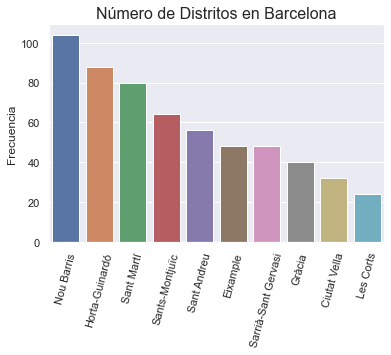

In [24]:
# Número de distritos en Barcelona
sns.set(style="darkgrid")

ax= sns.barplot(x=districtos.index, y=districtos)

plt.xticks(rotation=75)
plt.title("Número de Distritos en Barcelona", fontsize = 16)
ax.set_ylabel("Frecuencia")

plt.savefig('Número_Distritos.jpg', dpi=300, bbox_inches='tight') 

plt.show()

Los distritos con mayor registros son Nou Barris, Horta-Guarnidó y Sant Martí, representando el 46% de la información registrada.

* **Una variable numérica (Precio)**

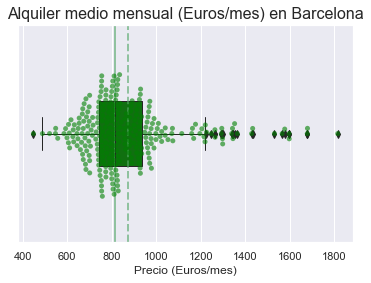

In [25]:
# Precio por mensual (Euros/mes) en Barcelona
sns.set(style="darkgrid")

ax= sns.boxplot(x="Preu", data=alquiler_Data[alquiler_Data.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)'],  
                color='green', fliersize=5, linewidth=1 , width=0.3)
ax= sns.swarmplot(x="Preu", data=alquiler_Data[alquiler_Data.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)'],  
                color='green', alpha = 0.6)

#graficar la media y mediana en el gráfico
ax.axvline(x=media_round, linewidth=2, color='g', label="mean", alpha=0.6,ls='--')
ax.axvline(x=median_round, linewidth=2, color='g', label="median", alpha=0.6,ls='-')

plt.title("Alquiler medio mensual (Euros/mes) en Barcelona", fontsize = 16)
ax.set_xlabel("Precio (Euros/mes)")

plt.savefig('Alquiler_mensual.jpg', dpi=300, bbox_inches='tight') 

plt.show()

**Observaciones:** Este gráfico muestra el precio de alquiler medio-mensual (Euros/mes) en Barcelona. 
* Se puede observar que existe una asimetría  sesgada a la izquierda, debido que el valor de la media es la inferior al valor de la mediana. 
* La parte izquierda de la caja es menor que la de la derecha, lo que indica que los alquileres estan comprendidos entre el 50% y el 75% de la muestra.
* Se pueden observa los valores atípicos en los alquileres, que se encuentran por encima del límite superior.

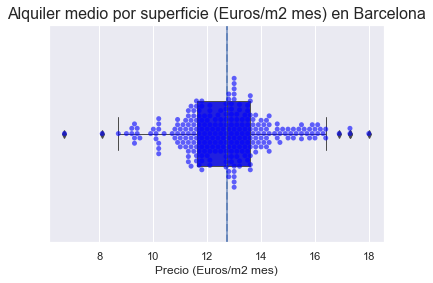

In [26]:
# Precio por superficie (Euros/m2 mes) en Barcelona
sns.set(style="darkgrid")

ax= sns.boxplot(x="Preu", data=alquiler_Data[alquiler_Data.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'], 
            color='blue', fliersize=5,  linewidth=1 , width=0.3)
ax= sns.swarmplot(x="Preu", data=alquiler_Data[alquiler_Data.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'],  
                color='blue', alpha = 0.6)

#graficar la media y mediana en el gráfico
ax.axvline(x=mean_m2_round, linewidth=2, color='b', label="mean", alpha=0.6,ls='--')
ax.axvline(x=median_round_m2, linewidth=2, color='b', label="median", alpha=0.6,ls='-')

plt.title("Alquiler medio por superficie (Euros/m2 mes) en Barcelona", fontsize = 16)
ax.set_xlabel("Precio (Euros/m2 mes)")

plt.savefig('Alquiler_superficie.jpg', dpi=300, bbox_inches='tight')

plt.show()

**Observaciones:** Este gráfico muestra el precio de alquiler por superficie (Euros/m2 mes)  en Barcelona. 
* En este grafico se puede observar que el valor de la media y la mediana son iguales, por lo que se infirere que es una distribución es simétrica. 
* La parte izquierda de la caja es levemente mayor que la de la derecha, lo que indica que los alquileres por m2 estan comprendidos entre el 25% y el 50% de la muestra.

* **Una variable numérica y una categórica (Distrito y Precio)**

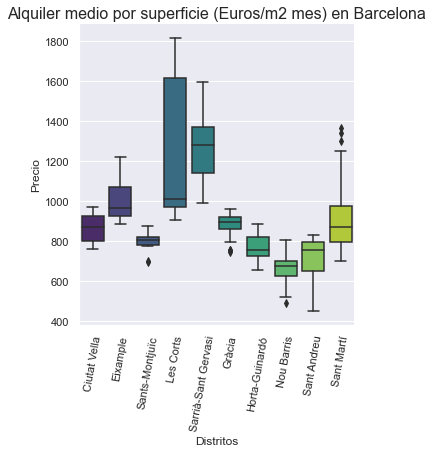

In [27]:
# Precio por superficie (Euros/m2 mes) y districto en Barcelona
sns.set(style="darkgrid")

ax = sns.catplot(x='Nom_Districte', y='Preu', kind='box',
                 data=alquiler_Data[alquiler_Data.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)'],
                 palette= "viridis")

plt.xticks(rotation=80)
ax.set(xlabel="Distritos", ylabel="Precio")
plt.title('Alquiler medio por superficie (Euros/m2 mes) en Barcelona', fontsize = 16)

plt.savefig('Alquiler_Precio_Dsitrito.jpg', dpi=300, bbox_inches='tight')

plt.show()

En este gráfico se observan:

* Los precios de alquiler promedio mensuales por distrito. 
* Los datos se concentran en la parte inferior de la distribución.
* La media suele ser mayor que la mediana.
* A excepción de los distritos Sarrià-Sant Gervasi y Les Corts, los distritos se encuentran en la media de los alquileres. 
* Los distritos con alquileres más altos son los de Sarrià-Sant Gervasi y Les Corts, sin embago en este último se observa asimetria positiva, ya que se encuentra por encima de la mediana la parte más larga de la caja. 

* **Dos variables numéricas (Año o Trimestre y Precio)**

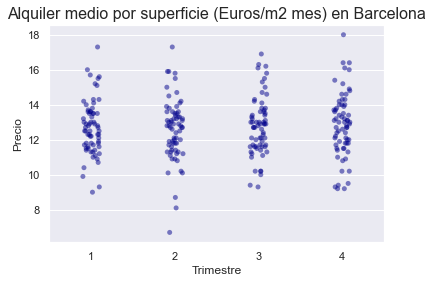

In [28]:
sns.set(style="darkgrid")

ax = sns.stripplot(x='Trimestre', y='Preu', data=alquiler_Data[alquiler_Data.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'], 
                   orient='v', color='darkblue', alpha= 0.5)

plt.title("Alquiler medio por superficie (Euros/m2 mes) en Barcelona", fontsize = 16)
ax.set(xlabel="Trimestre", ylabel="Precio")

plt.savefig('Alquiler_Trimestre_Precio.jpg', dpi=300, bbox_inches='tight')

plt.show()

Este gráfico muestra la variación del precio de los alquileres por metros cuadrados en función de los trimestres y los distritos. Se puede observar puntos menos dispersos en la parte media del gráfico y en los trimestres 1 y 3 una mayor dispersion en la arte superior del grafico. 

* **Tres variables (Distrito, Trimestre y Precio)**

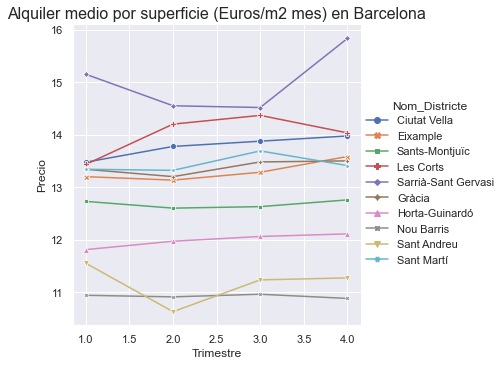

In [29]:
sns.set(style="darkgrid")

ax= sns.relplot(x="Trimestre", y="Preu", 
            data=alquiler_Data[alquiler_Data.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'], kind="line", 
            ci=None, style="Nom_Districte", hue="Nom_Districte", markers=True, dashes=False)

plt.title("Alquiler medio por superficie (Euros/m2 mes) en Barcelona", fontsize = 16)
ax.set(xlabel="Trimestre", ylabel="Precio")

plt.savefig('Distrito_Trim_Precio.jpg', dpi=300, bbox_inches='tight')

plt.show()

Este gráfico muestra la variación del precio de los alquileres por metros cuadrados en función de los trimestres y los distritos. Se puede observar que en la mayoria de los distritos se detecto un leve incremento en el precio mensual, en el tercer y cuarto trimestre, por lo que se infiere que en los meses de festivos tienden a incrementar los valores de alquileres.

## Ejercicio N°2

Exporta los gráficos como imágenes o HTML. **(Se exportaron durante la elaboración de la gráfica)**

## 1.3 Ejercicios N°3

Propone alguna visualización que creas que puede resultar interesante.

* **Los Distrito con el máximo alquiler mensual**

In [30]:
#Los Distrito con el máximo alquiler mensual

maximo = alquiler_Data[alquiler_Data.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)'].groupby(['Nom_Districte'])['Preu'].max('Preu').reset_index()
maximo

,Nom_Districte,Preu
0,Ciutat Vella,968.4
1,Eixample,1220.8
2,Gràcia,961.0
3,Horta-Guinardó,884.2
4,Les Corts,1816.5
5,Nou Barris,803.7
6,Sant Andreu,827.2
7,Sant Martí,1364.7
8,Sants-Montjuïc,872.5
9,Sarrià-Sant Gervasi,1597.4


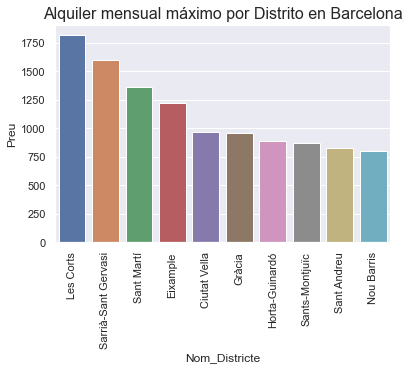

In [31]:
#El Distrito con el máximo alquiler mensual

sns.set(style="darkgrid")

sns.barplot(x="Nom_Districte", y="Preu", data = maximo.sort_values('Preu', ascending=False) )

plt.xticks(rotation=90)
plt.title('Alquiler mensual máximo por Distrito en Barcelona', fontsize = 16)

plt.savefig('Alquiler_max_distrito.jpg', dpi=300, bbox_inches='tight')

plt.show()

Los distritos como los alquileres más altos son Les Corts y Sarriat-Sant Gervasi con 1816.5 Euros y 1597.4 Euros respectivamente, quienes se encuentran por encima de media de 876 Euros/mes. Sin embargo es importante resaltar, que solo representan un 12% de los registros del dataset.

* **Los barrios con el maximo alquiler mensual :** Los alquileres más altos estan registrados en Les Corts y Sarriat-Sant Gervasi, se precedió a identificar cual son los barrio más costoso para alquilar


In [33]:
# El barrio con el maximo alquiler mensual del Distrito Les Corts

barrio_LesCorts = alquiler_Data[((alquiler_Data.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)') & 
                                 (alquiler_Data.Nom_Districte == 'Les Corts'))].groupby(['Nom_Barri'])['Preu'].max('Preu').reset_index()

barrio_LesCorts

,Nom_Barri,Preu
0,Pedralbes,1816.5
1,la Maternitat i Sant Ramon,982.9
2,les Corts,1052.8


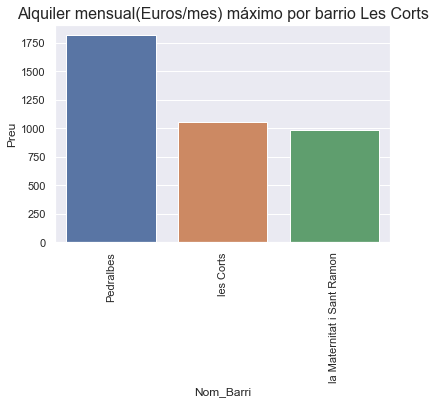

In [34]:
#El barrio con el maximo alquiler mensual del Distrito Les Corts

sns.set(style="darkgrid")

sns.barplot(x="Nom_Barri", y="Preu", data = barrio_LesCorts.sort_values('Preu', ascending=False) )

plt.xticks(rotation=90)
plt.title('Alquiler mensual(Euros/mes) máximo por barrio Les Corts', fontsize = 16)

plt.savefig('Alquiler_max_lescosrts.jpg', dpi=300, bbox_inches='tight')

plt.show()

In [35]:
# El barrio con el maximo alquiler mensual del Distrito Les Corts

barrio_Sarria = alquiler_Data[((alquiler_Data.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)') & 
                                 (alquiler_Data.Nom_Districte == 'Sarrià-Sant Gervasi'))].groupby(['Nom_Barri'])['Preu'].max('Preu').reset_index()

barrio_Sarria

,Nom_Barri,Preu
0,Sant Gervasi - Galvany,1433.7
1,Sant Gervasi - la Bonanova,1264.8
2,Sarrià,1345.2
3,"Vallvidrera, el Tibidabo i les Planes",1531.7
4,el Putxet i el Farró,1024.4
5,les Tres Torres,1597.4


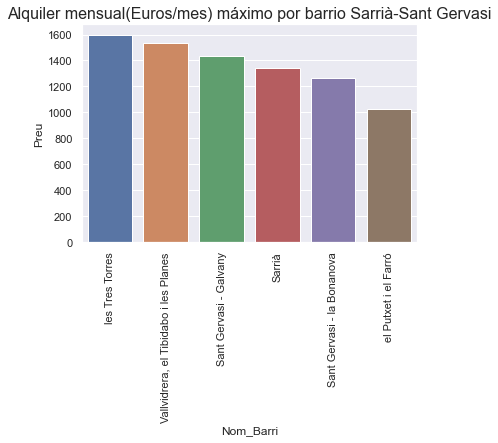

In [36]:
sns.set(style="darkgrid")

sns.barplot(x="Nom_Barri", y="Preu", data = barrio_Sarria.sort_values('Preu', ascending=False) )

plt.xticks(rotation=90)
plt.title('Alquiler mensual(Euros/mes) máximo por barrio Sarrià-Sant Gervasi', fontsize = 16)

plt.savefig('Alquiler_max_Sarria.jpg', dpi=300, bbox_inches='tight')

plt.show()

Los alquileres más altos estan registrados el distrito Les Corts, seguido de Sarriat-Sant Gervasi, sin embargo el distrito Les Corts solo tiene dos barrios muy encima de los valores medios de alquiler de los 3 barrios registrados. Por otro lado, el distrito Sarriat-Sant Gervasi tiene todos sus barrios (en el registro se muestran 6 barrios)  muy por encima de los valores medios de alquiler mensual en Barcelona, por lo que se infiere alguún valor atipico en el distirto Les Corts, en este sentido el Distrito Sarriat-Sant Gervasi se pudiera inferir como el distrito más costosos para alquilar. 